In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/MachineLearningProject/cleaned_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version
0,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4
1,Paper flowers instructions,Art And Design,4.4,167,5734.4,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3
2,Infinite Painter,Art And Design,4.1,36815,29696.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2
3,Garden Coloring Book,Art And Design,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0
4,Text on Photo - Fonteee,Art And Design,4.4,13880,28672.0,1000000,Free,0.0,Everyone,Art & Design,2017-10-27,1.0.4,4.1


In [ ]:
#converting into labeled dataset having only two label categories
#Popular vs. Not Popular: Based on a threshold of installs.

threshold = 100000
df['Label'] = df['Installs'].apply(lambda x: 'Popular' if x >= threshold else 'Not Popular')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version,Label
0,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4,Popular
1,Paper flowers instructions,Art And Design,4.4,167,5734.4,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3,Not Popular
2,Infinite Painter,Art And Design,4.1,36815,29696.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2,Popular
3,Garden Coloring Book,Art And Design,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0,Popular
4,Text on Photo - Fonteee,Art And Design,4.4,13880,28672.0,1000000,Free,0.0,Everyone,Art & Design,2017-10-27,1.0.4,4.1,Popular


In [ ]:
#convert 'Label' column to numeric values
df['Label'] = df['Label'].map({'Popular': 1, 'Not Popular': 0})

In [ ]:
#drop non-numeric or irrelevant columns
df = df.drop(columns=['App', 'Last Updated', 'Current Version'])

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Version,Label
0,Art And Design,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design,4.4,1
1,Art And Design,4.4,167,5734.4,50000,Free,0.0,Everyone,Art & Design,2.3,0
2,Art And Design,4.1,36815,29696.0,1000000,Free,0.0,Everyone,Art & Design,4.2,1
3,Art And Design,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,3.0,1
4,Art And Design,4.4,13880,28672.0,1000000,Free,0.0,Everyone,Art & Design,4.1,1


In [ ]:
unique_categories = df['Category'].unique()
print("Unique Categories:", unique_categories)

Unique Categories: ['Art And Design' 'Auto And Vehicles' 'Beauty' 'Books And Reference'
 'Business' 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment'
 'Events' 'Finance' 'Food And Drink' 'Health And Fitness' 'House And Home'
 'Libraries And Demo' 'Lifestyle' 'Game' 'Family' 'Medical' 'Social'
 'Shopping' 'Photography' 'Sports' 'Travel And Local' 'Tools'
 'Personalization' 'Productivity' 'Parenting' 'Weather' 'Video Players'
 'News And Magazines' 'Maps And Navigation']


In [ ]:
category_mapping = {category: idx for idx, category in enumerate([
    'Art And Design', 'Auto And Vehicles', 'Beauty', 'Books And Reference',
    'Business', 'Comics', 'Communication', 'Dating', 'Education', 'Entertainment',
    'Events', 'Finance', 'Food And Drink', 'Health And Fitness', 'House And Home',
    'Libraries And Demo', 'Lifestyle', 'Game', 'Family', 'Medical', 'Social',
    'Shopping', 'Photography', 'Sports', 'Travel And Local', 'Tools',
    'Personalization', 'Productivity', 'Parenting', 'Weather', 'Video Players',
    'News And Magazines', 'Maps And Navigation'
])}

df['Category'] = df['Category'].map(category_mapping)

print(df.head())


   Category  Rating  Reviews     Size  Installs  Type  Price Content Rating  \
0         0     4.3      967   2867.2    100000  Free    0.0       Everyone   
1         0     4.4      167   5734.4     50000  Free    0.0       Everyone   
2         0     4.1    36815  29696.0   1000000  Free    0.0       Everyone   
3         0     4.4    13791  33792.0   1000000  Free    0.0       Everyone   
4         0     4.4    13880  28672.0   1000000  Free    0.0       Everyone   

         Genres  Android Version  Label  
0  Art & Design              4.4      1  
1  Art & Design              2.3      0  
2  Art & Design              4.2      1  
3  Art & Design              3.0      1  
4  Art & Design              4.1      1  


In [ ]:
unique_types = df['Type'].unique()
print("Unique Types:", unique_types)

Unique Types: ['Free' 'Paid']


In [ ]:
type_mapping = {'Free': 0, 'Paid': 1}
df['Type'] = df['Type'].map(type_mapping)


In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Version,Label
0,0,4.3,967,2867.2,100000,0,0.0,Everyone,Art & Design,4.4,1
1,0,4.4,167,5734.4,50000,0,0.0,Everyone,Art & Design,2.3,0
2,0,4.1,36815,29696.0,1000000,0,0.0,Everyone,Art & Design,4.2,1
3,0,4.4,13791,33792.0,1000000,0,0.0,Everyone,Art & Design,3.0,1
4,0,4.4,13880,28672.0,1000000,0,0.0,Everyone,Art & Design,4.1,1


In [ ]:
unique_content_ratings = df['Content Rating'].unique()
print("Unique Content Ratings:", unique_content_ratings)

Unique Content Ratings: ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [ ]:
content_rating_mapping = {
    'Everyone': 0,
    'Everyone 10+': 1,
    'Teen': 2,
    'Mature 17+': 3,
    'Adults only 18+': 4,
    'Unrated': 5
}
df['Content Rating'] = df['Content Rating'].map(content_rating_mapping)

In [ ]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Version,Label
0,0,4.3,967,2867.2,100000,0,0.0,0,Art & Design,4.4,1
1,0,4.4,167,5734.4,50000,0,0.0,0,Art & Design,2.3,0
2,0,4.1,36815,29696.0,1000000,0,0.0,0,Art & Design,4.2,1
3,0,4.4,13791,33792.0,1000000,0,0.0,0,Art & Design,3.0,1
4,0,4.4,13880,28672.0,1000000,0,0.0,0,Art & Design,4.1,1


In [ ]:
unique_genres = df['Genres'].unique()
print("Unique Genres:", unique_genres)

Unique Genres: ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Strategy' 'Action' 'Puzzle' 'Music' 'Word' 'Racing' 'Sports' 'Board'
 'Trivia' 'Simulation' 'Role Playing' 'Educational' 'Music & Audio'
 'Video Players & Editors' 'Medical' 'Social' 'Shopping' 'Photography'
 'Travel & Local' 'Tools' 'Personalization' 'Productivity' 'Parenting'
 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [ ]:
genres_mapping = {genre: idx for idx, genre in enumerate(unique_genres)}
df['Genres'] = df['Genres'].map(genres_mapping)

In [ ]:
df.head(25)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Version,Label
0,0,4.300000,967,2867.2,100000,0,0.0,0,0,4.4,1
1,0,4.400000,167,5734.4,50000,0,0.0,0,0,2.3,0
2,0,4.100000,36815,29696.0,1000000,0,0.0,0,0,4.2,1
3,0,4.400000,13791,33792.0,1000000,0,0.0,0,0,3.0,1
4,0,4.400000,13880,28672.0,1000000,0,0.0,0,0,4.1,1
5,0,4.400000,8788,12288.0,1000000,0,0.0,0,0,4.0,1
6,0,4.200000,44829,20480.0,10000000,0,0.0,2,0,4.1,1
7,0,4.600000,4326,21504.0,100000,0,0.0,0,0,4.4,1
8,0,4.400000,1518,37888.0,100000,0,0.0,0,0,2.3,1
9,0,4.700000,3632,5632.0,500000,0,0.0,0,0,4.1,1


In [ ]:
svm_data = df.copy()

In [ ]:
svm_data.to_csv('svm_data.csv', index=False)

In [ ]:
X = df.drop(columns=['Label'])
y = df['Label']

#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Training Dataset:")
X_train.head()

Training Dataset:


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Version
1965,29,4.2,18773,12288.0,10000000,0,0.0,0,44,4.4
864,17,4.2,1497361,33792.0,100000000,0,0.0,0,22,4.1
2847,25,4.1,6267,1740.8,1000000,0,0.0,0,40,3.2
6134,18,3.7,7203,32768.0,1000000,0,0.0,0,30,4.0
5413,6,4.4,552635,29696.0,10000000,0,0.0,0,6,4.1


In [ ]:
print("\nTraining Labels:")
y_train.head()


Training Labels:


,Label
1965,1
864,1
2847,1
6134,1
5413,1


In [ ]:
print("\nTesting Dataset:")
X_test.head()


Testing Dataset:


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Version
2952,4,4.193338,3,1740.8,100,0,0.00,0,4,4.0
1634,23,4.500000,107724,6656.0,5000000,0,0.00,0,27,4.0
2622,27,3.800000,24517,22528.0,10000000,0,0.00,0,42,5.0
7045,29,3.800000,30,2048.0,1000,1,6.99,0,44,2.3
6729,20,4.200000,22650,1536.0,1000000,0,0.00,0,36,4.0


In [ ]:
kernels = ['linear', 'rbf', 'poly']
costs = [0.1, 1, 10]
results = []

for kernel in kernels:
    for cost in costs:
        svm_model = SVC(kernel=kernel, C=cost, random_state=42)
        svm_model.fit(X_train_scaled, y_train)

        y_pred = svm_model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        results.append((kernel, cost, acc, conf_matrix))

        print(f"Kernel: {kernel}, Cost: {cost}")
        print(f"Accuracy: {acc}")
        print(f"Confusion Matrix:\n{conf_matrix}\n")

Kernel: linear, Cost: 0.1
Accuracy: 0.7213793103448276
Confusion Matrix:
[[641  70]
 [334 405]]

Kernel: linear, Cost: 1
Accuracy: 0.76
Confusion Matrix:
[[684  27]
 [321 418]]

Kernel: linear, Cost: 10
Accuracy: 0.8551724137931035
Confusion Matrix:
[[711   0]
 [210 529]]

Kernel: rbf, Cost: 0.1
Accuracy: 0.6813793103448276
Confusion Matrix:
[[527 184]
 [278 461]]

Kernel: rbf, Cost: 1
Accuracy: 0.7468965517241379
Confusion Matrix:
[[615  96]
 [271 468]]

Kernel: rbf, Cost: 10
Accuracy: 0.7620689655172413
Confusion Matrix:
[[657  54]
 [291 448]]

Kernel: poly, Cost: 0.1
Accuracy: 0.6006896551724138
Confusion Matrix:
[[208 503]
 [ 76 663]]

Kernel: poly, Cost: 1
Accuracy: 0.6820689655172414
Confusion Matrix:
[[395 316]
 [145 594]]

Kernel: poly, Cost: 10
Accuracy: 0.7137931034482758
Confusion Matrix:
[[500 211]
 [204 535]]



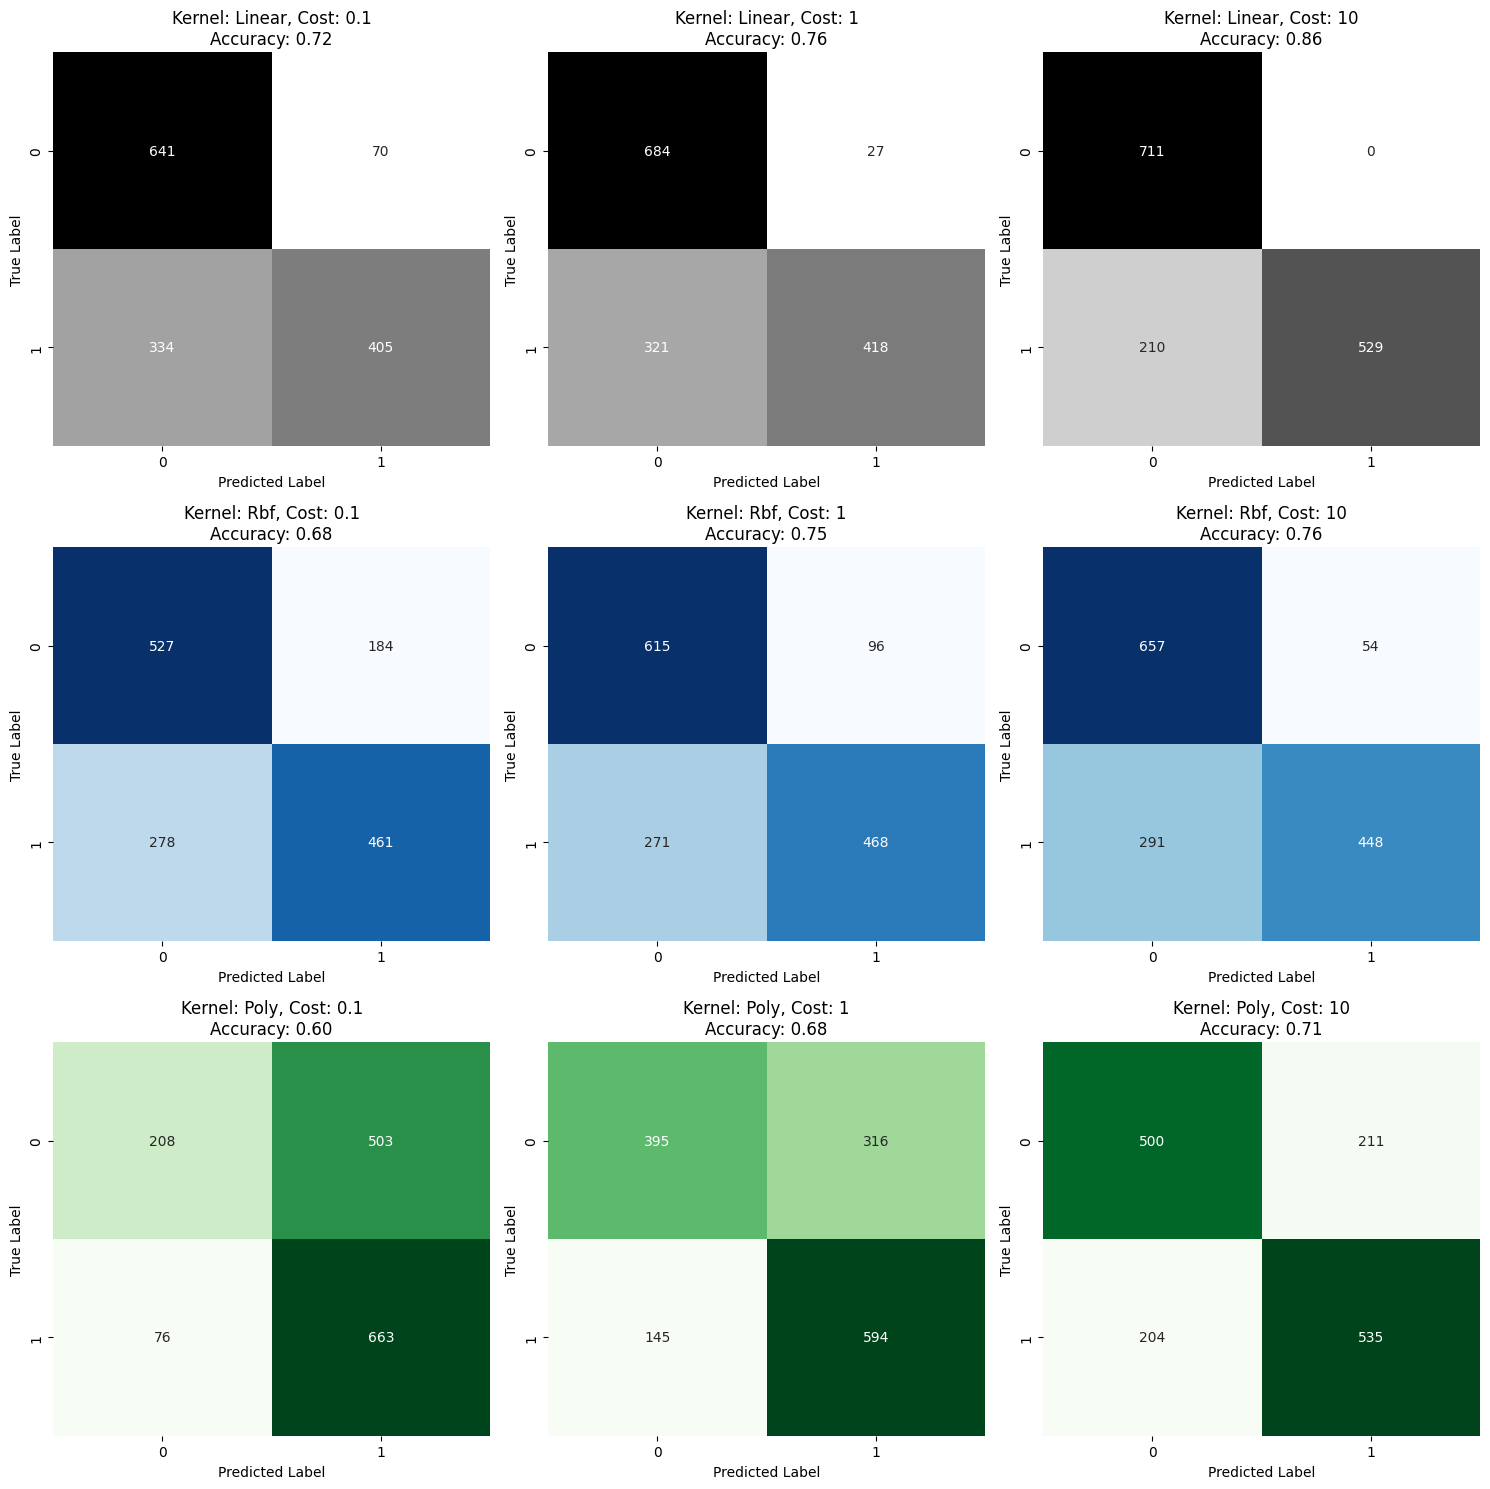

In [ ]:
def plot_multiple_confusion_matrices(results):
    color_mapping = {
        'linear': 'Greys',
        'rbf': 'Blues',
        'poly': 'Greens'
    }

    num_matrices = len(results)
    rows = (num_matrices // 3) + (1 if num_matrices % 3 != 0 else 0)

    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
    axes = axes.flatten()

    for idx, result in enumerate(results):
        kernel, cost, acc, conf_matrix = result
        cmap = color_mapping.get(kernel, 'Reds')
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False, ax=axes[idx])
        axes[idx].set_title(f'Kernel: {kernel.capitalize()}, Cost: {cost}\nAccuracy: {acc:.2f}')
        axes[idx].set_xlabel('Predicted Label')
        axes[idx].set_ylabel('True Label')

    for idx in range(len(results), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

plot_multiple_confusion_matrices(results)


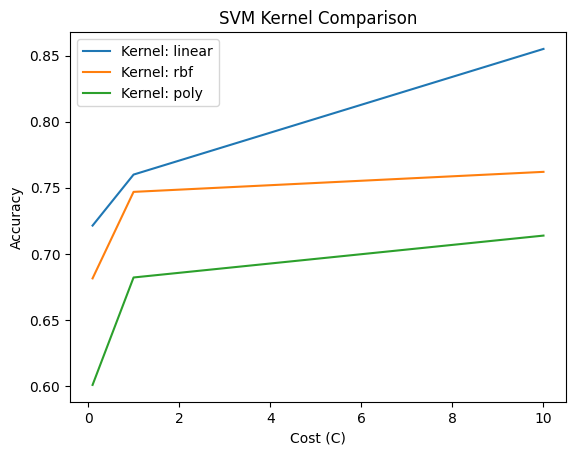

In [ ]:
for kernel in kernels:
    kernel_accuracies = [result[2] for result in results if result[0] == kernel]
    plt.plot(costs, kernel_accuracies, label=f'Kernel: {kernel}')

plt.xlabel('Cost (C)')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Comparison')
plt.legend()
plt.show()

In [ ]:
best_result = max(results, key=lambda x: x[2])
best_kernel, best_cost, best_accuracy, best_conf_matrix = best_result
print(f"Best Kernel: {best_kernel}, Cost: {best_cost}, Accuracy: {best_accuracy}")
print(f"Confusion Matrix for Best Model:\n{best_conf_matrix}")

Best Kernel: linear, Cost: 10, Accuracy: 0.8551724137931035
Confusion Matrix for Best Model:
[[711   0]
 [210 529]]


Linear SVC accuracy: 0.6613793103448276
RBF SVC accuracy: 0.6627586206896552
Polynomial SVC accuracy: 0.58


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


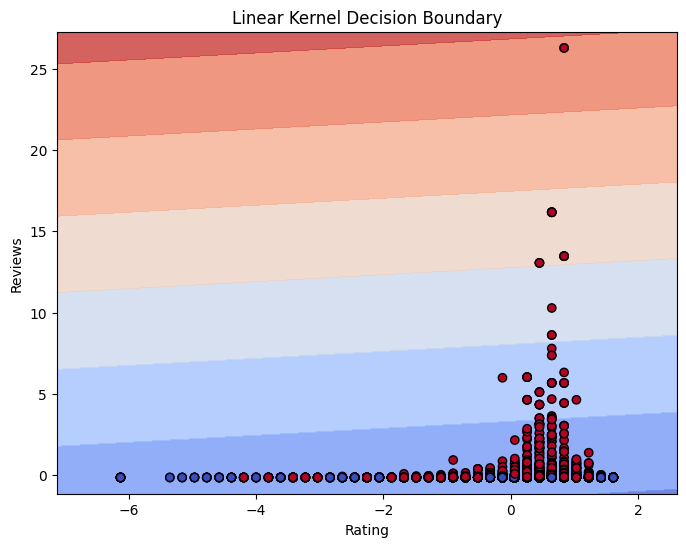

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


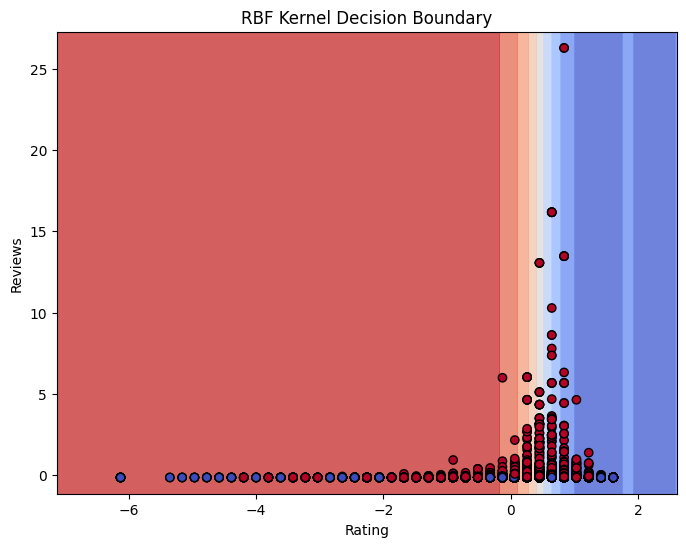

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


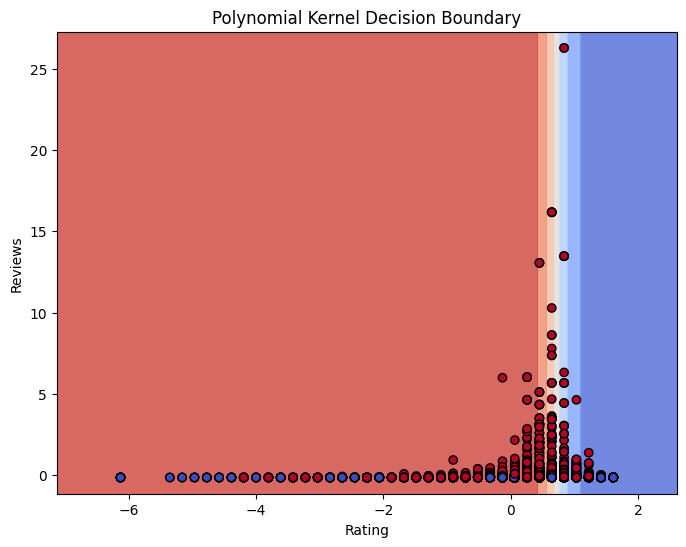

In [ ]:
X = df[['Rating', 'Reviews']]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="linear", probability=True))
])
rbf_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", probability=True))
])
poly_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="poly", degree=3, probability=True))
])

linear_svc.fit(X_train, y_train)
rbf_svc.fit(X_train, y_train)
poly_svc.fit(X_train, y_train)

accuracy_linear = accuracy_score(y_test, linear_svc.predict(X_test))
accuracy_rbf = accuracy_score(y_test, rbf_svc.predict(X_test))
accuracy_poly = accuracy_score(y_test, poly_svc.predict(X_test))

print("Linear SVC accuracy:", accuracy_linear)
print("RBF SVC accuracy:", accuracy_rbf)
print("Polynomial SVC accuracy:", accuracy_poly)

def plot_svc_decision_boundary(model, X, y, figsize=(8, 6), title=None):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Rating")
    plt.ylabel("Reviews")
    plt.show()

#decision boundaries for each SVM model
plot_svc_decision_boundary(linear_svc, X_train.values, y_train, title="Linear Kernel Decision Boundary")
plot_svc_decision_boundary(rbf_svc, X_train.values, y_train, title="RBF Kernel Decision Boundary")
plot_svc_decision_boundary(poly_svc, X_train.values, y_train, title="Polynomial Kernel Decision Boundary")
